In [2]:
import pkg_resources
pkg_resources.require("scikit-learn==0.24.2")
import sklearn
import nltk
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt, mpld3
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import re
from mpl_toolkits.mplot3d import Axes3D
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import emoji
import requests  ## for getting data from a server

import graphviz

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

from sklearn import preprocessing

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pyLDAvis.sklearn as LDAvis
import pyLDAvis

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

In [3]:
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/xingyuchen0810/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [26]:
filename="moviereviewDATA_Sentiment_LabelAtEND.csv"
df = pd.read_csv(filename)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 178 entries, text to Unnamed: 177
dtypes: object(178)
memory usage: 2.7+ MB


In [28]:
df.head()

,text,reviewclass,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177
0,'plot : two teen couples go to a church party,drink and then drive . \nthey get into an acc...,but his girlfriend continues to see him in he...,and has nightmares . \nwhat\'s the deal ? \nw...,but presents it in a very bad package . \nwhi...,since i generally applaud films which attempt...,mess with your head and such ( lost highway &...,but there are good and bad ways of making all...,and these folks just didn\'t snag this one co...,but executed it terribly . \nso what are the ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'the happy bastard\'s quick movie review \ndam...,virus still feels very empty,like a movie going for all flash and no subst...,we don\'t know the origin of what took over t...,and,of course,we don\'t know why donald sutherland is stumb...,"it\'s just \"" hey",let\'s chase these people around with some ro...,even from the likes of curtis . \nyou\'re mor...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'it is movies like these that make a jaded mov...,the mod squad tells the tale of three reforme...,things go wrong as evidence gets stolen and t...,the ads make it seem like so much more . \nqu...,cool music,claire dane\'s nice hair and cute outfits,car chases,stuff blowing up,and the like . \nsounds like a cool movie,does it not ? \nafter the first fifteen minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"' \"" quest for camelot \"" is warner bros . \' ...",fully-animated attempt to steal clout from di...,but the mouse has no reason to be worried . \...,if flawed,"20th century fox production \"" anastasia","\"" but disney\'s \"" hercules","\"" with its lively cast and colorful palate",had her beat hands-down when it came time to ...,it\'s no contest,"as \"" quest for camelot \"" is pretty much dea...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'synopsis : a mentally unstable man undergoing...,a fledgling restauranteur . \nunsuccessfully ...,he takes pictures of her and kills a number o...,both theatrical and direct-to-video . \ntheir...,no big name stars ) and serve as vehicles to ...,he\'s rejected rather quickly ( the psycho ty...,ex-wife,or ex-husband ) . \nother than that,stalked is just another redundant entry doome...,though that is what it sets out to do . \nint...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
import pandas as pd
new_df = pd.DataFrame()
# Assuming your dataframe is named 'df'
df.columns = ['' for col in df.columns]
new_df['combined_col'] = df.apply(lambda x: ''.join([str(val) for val in x.values if not pd.isna(val)]), axis=1)

In [43]:
new_df.head()

,combined_col
0,'plot : two teen couples go to a church party ...
1,'the happy bastard\'s quick movie review \ndam...
2,'it is movies like these that make a jaded mov...
3,"' \"" quest for camelot \"" is warner bros . \' ..."
4,'synopsis : a mentally unstable man undergoing...


In [48]:

new_df.to_csv('new_df.csv')

In [47]:
import pandas as pd

# check if the keywords are present in each row
new_df['label'] = new_df['combined_col'].apply(lambda x: 'neg' if 'neg' in x else 'pos' if 'pos' in x else None)
# # map the boolean values to label values
# df['label'] = df['contains_keyword'].map({True: 'contains', False: 'not contains'})
# define the keywords to remove
keywords = ['neg', 'pos']

# remove the keywords from the text column
new_df['combined_col'] = new_df['combined_col'].str.replace('|'.join(keywords), '')
# display the updated DataFrame
print(new_df.head())


                                        combined_col label
0  'plot : two teen couples go to a church party ...   neg
1  'the happy bastard\'s quick movie review \ndam...   neg
2  'it is movies like these that make a jaded mov...   neg
3  ' \" quest for camelot \" is warner bros . \' ...   neg
4  'synopsis : a mentally unstable man undergoing...   neg


/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_96988/3067908957.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  new_df['combined_col'] = new_df['combined_col'].str.replace('|'.join(keywords), '')


In [49]:
new_df['label'].describe()

count     2000
unique       2
top        neg
freq      1088
Name: label, dtype: object

/opt/homebrew/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/homebrew/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/homebrew/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/homebrew/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

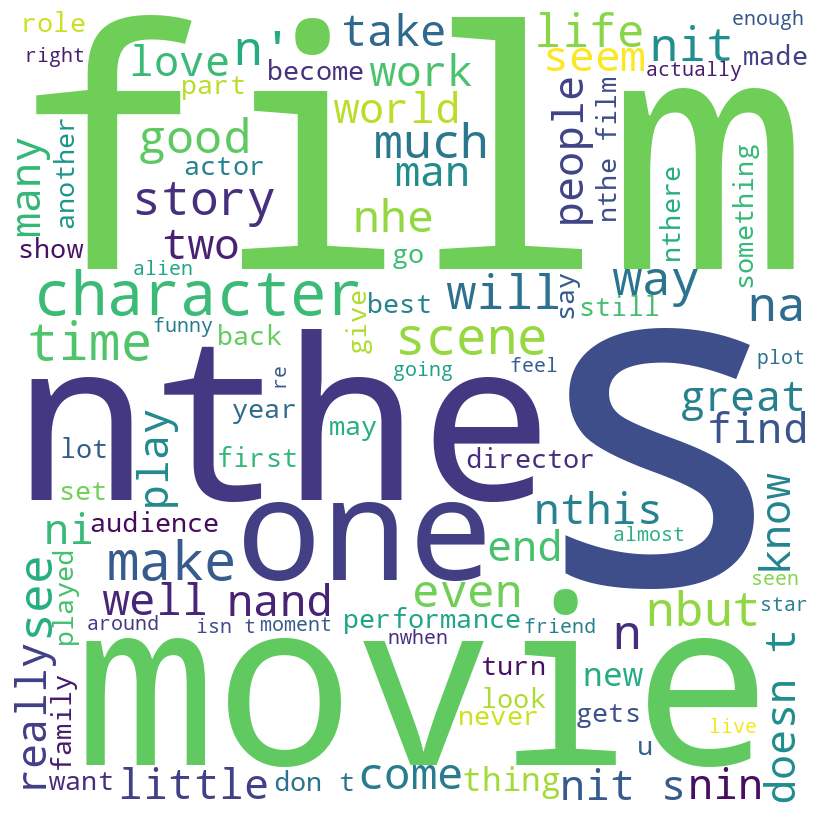

In [57]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue')
text_data = ' '.join(new_df[new_df['label'] == 'pos']['combined_col'])
# Generate the word cloud
wordcloud.generate(text_data)

# Visualize the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()

In [52]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Convert all text to lowercase
new_df['cleaned'] = new_df['combined_col'].apply(lambda x: x.lower())

# Remove punctuation and numbers
new_df['cleaned'] = new_df['cleaned'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

# Tokenize the text into words
new_df['cleaned'] = new_df['cleaned'].apply(lambda x: nltk.word_tokenize(x))

# Remove stop words
stop_words = set(stopwords.words('english'))
new_df['cleaned'] = new_df['cleaned'].apply(lambda x: [word for word in x if word not in stop_words])

# Remove extra whitespace
new_df['cleaned'] = new_df['cleaned'].apply(lambda x: [word.strip() for word in x])

# Join the words back into a string
new_df['cleaned'] =new_df['cleaned'].apply(lambda x: ' '.join(x))


In [53]:
new_df['cleaned'].head()

0    plot two teen couples go church party drink dr...
1    happy bastard quick movie review ndamn k bug n...
2    movies like make jaded movie viewer thankful i...
3    quest camelot warner bros first feature length...
4    synopsis mentally unstable man undergoing psyc...
Name: cleaned, dtype: object

/opt/homebrew/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/homebrew/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/homebrew/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
/opt/homebrew/lib/python3.10/site-packages/wordcloud/wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

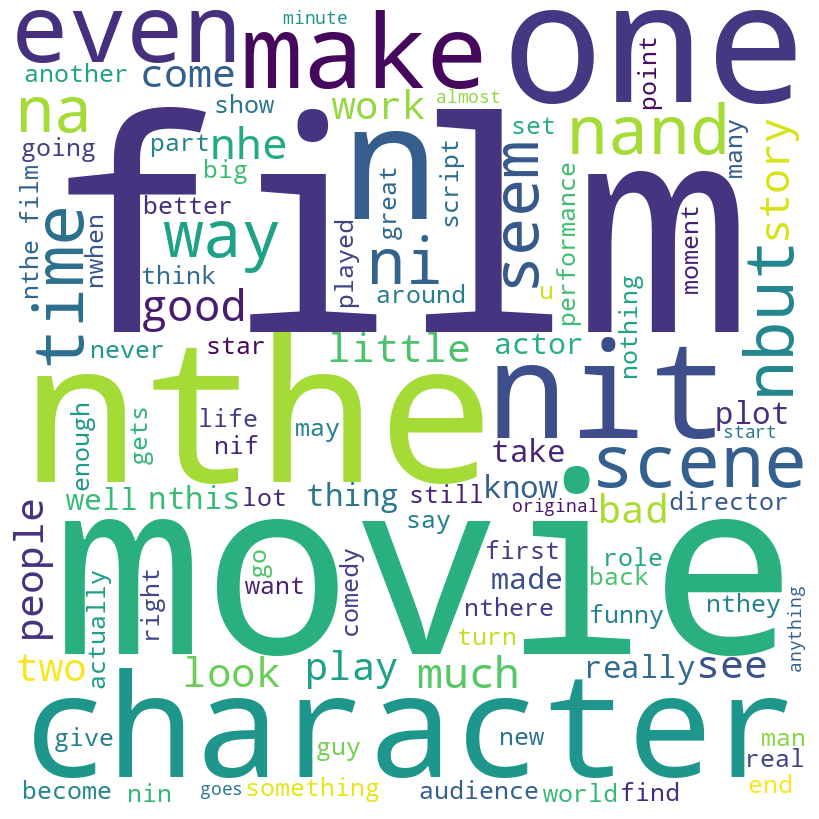

In [59]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue')
text_data = ' '.join(new_df[new_df['label'] == 'neg']['cleaned'])
# Generate the word cloud
wordcloud.generate(text_data)

# Visualize the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()

In [60]:

new_df.to_csv('CleanDF_Xingyu.csv')

In [61]:
filename="CleanDF_Xingyu.csv"
df1 = pd.read_csv(filename)

In [62]:
df1.head()

,label,cleaned
0,neg,plot two teen couples go church party drink dr...
1,neg,happy bastard quick movie review ndamn k bug n...
2,neg,movies like make jaded movie viewer thankful i...
3,neg,quest camelot warner bros first feature length...
4,neg,synopsis mentally unstable man undergoing psyc...


In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

# # create a WordNetLemmatizer object
# lemmatizer = WordNetLemmatizer()

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

MyVect_lemm=CountVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=LemmaTokenizer()
                        )


MyVect_30=CountVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        max_features=30
                        )


In [73]:
FinalDF_lemm=pd.DataFrame()
FinalDF_30=pd.DataFrame()

X1=MyVect_lemm.fit_transform(df1['cleaned'])
X2=MyVect_30.fit_transform(df1['cleaned'])        
        
ColumnNames1=MyVect_lemm.get_feature_names()
NumFeatures1=len(ColumnNames1)
ColumnNames2=MyVect_30.get_feature_names()
NumFeatures2=len(ColumnNames2)

builderS=pd.DataFrame(X1.toarray(),columns=ColumnNames1)
builderT=pd.DataFrame(X2.toarray(),columns=ColumnNames2)
builderS["Label"]=df1['label']
builderT["Label"]=df1['label']

    
FinalDF_lemm= FinalDF_lemm.append(builderS)
FinalDF_30= FinalDF_30.append(builderT)



/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_96988/1122206327.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FinalDF_lemm= FinalDF_lemm.append(builderS)
/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_96988/1122206327.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FinalDF_30= FinalDF_30.append(builderT)


In [74]:
FinalDF_lemm.head()

,aa,aaa,aaaaaah,aaaahhhs,aahs,aaliyah,aalyah,aamir,aardman,aaron,...,zukovsky,zulu,zundel,zurg,zweibel,zwick,zwigoff,zycie,zzzzzzz,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg


In [76]:
FinalDF_30.head()

,bad,best,character,characters,film,films,good,life,like,little,...,nthis,people,plot,really,scene,scenes,story,time,way,Label
0,2,0,2,1,6,2,2,1,3,2,...,0,1,1,2,0,2,0,0,3,neg
1,0,0,0,0,0,0,1,0,3,0,...,0,1,0,2,0,0,1,1,0,neg
2,0,1,0,3,8,1,0,0,4,0,...,0,0,2,3,0,0,0,1,2,neg
3,1,1,0,1,1,0,1,0,1,0,...,1,0,0,0,0,1,1,1,1,neg
4,2,0,1,0,2,1,1,0,1,0,...,0,1,1,1,0,1,3,2,1,neg


<class 'scipy.sparse._csr.csr_matrix'>
['aatish', 'ab', 'aback', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons', 'abating', 'abba']
<class 'numpy.ndarray'>
      aa  aaa  aaaaaah  aaaahhhs  aahs  aaliyah  aalyah  aamir  aardman  \
0      0    0        0         0     0        0       0      0        0   
1      0    0        0         0     0        0       0      0        0   
2      0    0        0         0     0        0       0      0        0   
3      0    0        0         0     0        0       0      0        0   
4      0    0        0         0     0        0       0      0        0   
...   ..  ...      ...       ...   ...      ...     ...    ...      ...   
1995   0    0        0         0     0        0       0      0        0   
1996   0    0        0         0     0        0       0      0        0   
1997   0    0        0         0     0        0       0      0        0   
1998   0    0        0         0     0        0       0      0        0   
19

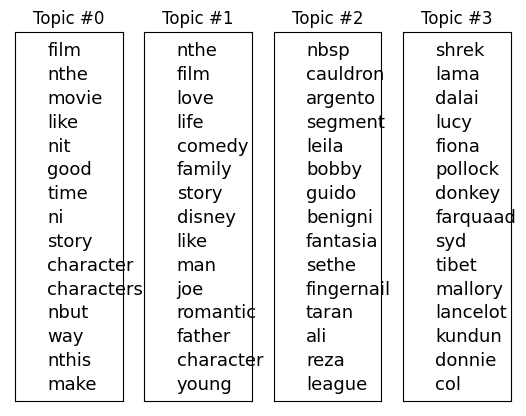

In [84]:
# LDA1
### Vectorize
MyCountV=CountVectorizer(
    input="content",
    lowercase=True,
    stop_words = "english"
)

MyDTM = MyCountV.fit_transform(df1['cleaned'])  # create a sparse matrix
print(type(MyDTM))
#vocab is a vocabulary list
vocab = MyCountV.get_feature_names()  # change to a list
print(list(vocab)[10:20])


MyDTM = MyDTM.toarray()  # convert to a regular array
print(type(MyDTM))

ColumnNames=MyCountV.get_feature_names()
MyDTM_DF=pd.DataFrame(MyDTM,columns=ColumnNames)
print(MyDTM_DF)

num_topics = 4

lda_model_DH = LatentDirichletAllocation(n_components=num_topics,
                                         max_iter=20, learning_method='online', verbose=True)
LDA_DH_Model = lda_model_DH.fit_transform(MyDTM_DF)

word_topic = np.array(lda_model_DH.components_)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(vocab)
fontsize_base = 13

fig = plt.figure()
for t in range(num_topics):

    plt.subplot(1, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
        ##fontsize_base*share)

mpld3.save_html(fig,'lda1.html')

In [85]:
# LDA2
pyLDAvis.enable_notebook() ## not using notebook

dtm = np.matrix(MyDTM)
panel = LDAvis.prepare(lda_model_DH, dtm, MyCountV, mds='tsne')

pyLDAvis.save_html(panel, "lda2.html")

/opt/homebrew/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/opt/homebrew/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
14705.06s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
14705.12s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
14705.13s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
14705.13s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
14705.14s - pydevd: Sending message related to process being replaced timed-out after 5 se

In [89]:
df1['lencount'] = df1['cleaned'].str.len()

In [90]:
df1['lencount'].describe()

count     2000.000000
mean      2574.512000
std       1124.488663
min         51.000000
25%       1823.000000
50%       2393.500000
75%       3112.750000
max      10544.000000
Name: lencount, dtype: float64

In [91]:

df_tem = df1[df1['cleaned'].apply(lambda x: len(x) > 2000) & df1['cleaned'].apply(lambda x: len(x) < 2500)]

In [92]:
df_tem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 1998
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     426 non-null    object
 1   cleaned   426 non-null    object
 2   lencount  426 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 13.3+ KB


In [93]:
df_tem['label'].describe()

count     426
unique      2
top       neg
freq      247
Name: label, dtype: object

In [96]:
# function to drop columns containing 'n' or 'nthe'
def drop_columns(row):
    return [col for col in row.index if 'n' in row[col] or 'nthe' in row[col]]

# apply the function to each row
cols_to_drop = df_tem.apply(drop_columns, axis=1)

# drop the identified columns from the dataframe
df_tem = df_tem.drop(columns=cols_to_drop)


TypeError: argument of type 'int' is not iterable

In [100]:

arm_df = df1['cleaned'].str.split(expand=True)
arm_df = arm_df.apply(lambda x: x[x.str.len() > 4], axis=1)

arm_df['label'] = df1['label']
arm_df = arm_df.reset_index(drop=True)

arm_df.to_csv('ARMdata_Xingyu.csv')


/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_96988/400500901.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  arm_df['label'] = df1['label']


In [101]:
FinalDF_30.head()

,bad,best,character,characters,film,films,good,life,like,little,...,nthis,people,plot,really,scene,scenes,story,time,way,Label
0,2,0,2,1,6,2,2,1,3,2,...,0,1,1,2,0,2,0,0,3,neg
1,0,0,0,0,0,0,1,0,3,0,...,0,1,0,2,0,0,1,1,0,neg
2,0,1,0,3,8,1,0,0,4,0,...,0,0,2,3,0,0,0,1,2,neg
3,1,1,0,1,1,0,1,0,1,0,...,1,0,0,0,0,1,1,1,1,neg
4,2,0,1,0,2,1,1,0,1,0,...,0,1,1,1,0,1,3,2,1,neg


In [102]:
tem_df = FinalDF_30

In [112]:
# Set aside 20 pos and 20 neg rows for testincsc

train_df=FinalDF_30

test_pos = train_df[train_df['Label'] == 'pos'].head(20)
test_neg = train_df[train_df['Label'] == 'neg'].head(20)
train_df = train_df.drop(test_pos.index)
train_df = train_df.drop(test_neg.index)
test_df = pd.concat([test_neg, test_pos])

test_pos = test_pos.drop(['Label'], axis= 1)
test_neg = test_neg.drop(['Label'], axis=1)

## TRAIN ----------------------------
train_label=train_df["Label"]
## remove labels
train_data = train_df.drop(["Label"], axis=1)

## TRAIN ----------------------------
test_label=test_df["Label"]
## remove labels
test_data = test_df.drop(["Label"], axis=1)



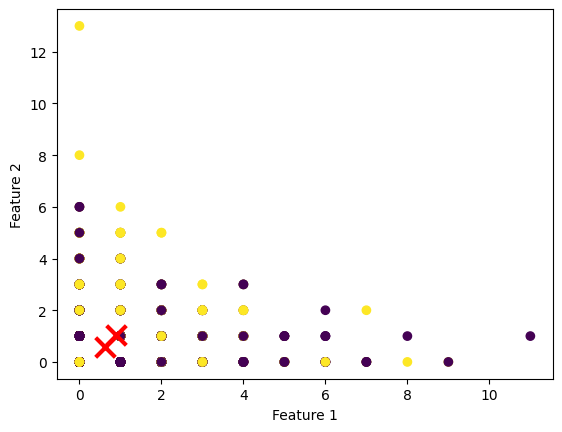

In [113]:
# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42).fit(train_data)

# Visualize the clusters
plt.scatter(train_data.iloc[:, 0], train_data.iloc[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [115]:
# Calculate the Euclidean distance between the test vectors and the centroids
dist_pos = np.sqrt(np.sum((test_pos - kmeans.cluster_centers_[0])**2, axis=1))
dist_neg = np.sqrt(np.sum((test_neg - kmeans.cluster_centers_[1])**2, axis=1))

# Determine the best method to understand what each cluster represents
# We can look at the features that have the highest absolute difference between the two centroids
diff = np.abs(kmeans.cluster_centers_[0] - kmeans.cluster_centers_[1])
top_features = np.argsort(diff)[::-1][:5]

# Print the top features
print('Top 5 features that have the highest absolute difference between the two centroids:')
for feature in top_features:
    print('- Feature {}: {}'.format(feature+1, test_df.columns[feature+1]))


Top 5 features that have the highest absolute difference between the two centroids:
- Feature 5: films
- Feature 21: nthis
- Feature 9: little
- Feature 20: nthe
- Feature 18: nin


In [117]:
filename="CleanDF_Xingyu.csv"
df1 = pd.read_csv(filename)

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

# # create a WordNetLemmatizer object
# lemmatizer = WordNetLemmatizer()

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

MyCV1=CountVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english'
                        )

MyVect_lemm=CountVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=LemmaTokenizer()
                        )


MyVect_30=CountVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        max_features=30
                        )

FinalDF1=pd.DataFrame() 
FinalDF2=pd.DataFrame()
FinalDF3=pd.DataFrame()


In [124]:

X1=MyCV1.fit_transform(df1['cleaned'])
X2=MyVect_lemm.fit_transform(df1['cleaned'])
X3=MyVect_30.fit_transform(df1['cleaned'])        

ColumnNames1=MyCV1.get_feature_names()
NumFeatures1=len(ColumnNames1)
ColumnNames2=MyVect_lemm.get_feature_names()
NumFeatures2=len(ColumnNames2)
ColumnNames3=MyVect_30.get_feature_names()
NumFeatures3=len(ColumnNames3)

builder1=pd.DataFrame(X1.toarray(),columns=ColumnNames1)
builder2=pd.DataFrame(X2.toarray(),columns=ColumnNames2)
builder3=pd.DataFrame(X3.toarray(),columns=ColumnNames3)

FinalDF1= FinalDF1.append(builder1)

FinalDF2= FinalDF2.append(builder1)
FinalDF3= FinalDF3.append(builder3)



/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_96988/534028699.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FinalDF1= FinalDF1.append(builder1)
/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_96988/534028699.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  FinalDF2= FinalDF2.append(builder1)
/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_96988/534028699.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

In [125]:
FinalDF1['Label'] = df1['label']

FinalDF2['Label'] = df1['label']

FinalDF3['Label'] = df1['label']


In [126]:
FinalDF3.head()

,bad,best,character,characters,film,films,good,life,like,little,...,nthis,people,plot,really,scene,scenes,story,time,way,Label
0,2,0,2,1,6,2,2,1,3,2,...,0,1,1,2,0,2,0,0,3,neg
1,0,0,0,0,0,0,1,0,3,0,...,0,1,0,2,0,0,1,1,0,neg
2,0,1,0,3,8,1,0,0,4,0,...,0,0,2,3,0,0,0,1,2,neg
3,1,1,0,1,1,0,1,0,1,0,...,1,0,0,0,0,1,1,1,1,neg
4,2,0,1,0,2,1,1,0,1,0,...,0,1,1,1,0,1,3,2,1,neg


In [127]:
##################################################
##
##        Now we have 4 labeled dataframes!
##
##        Let's model them.....
##
######################################################

## Create the testing set - grab a sample from the training set. 
## Be careful. Notice that right now, our train set is sorted by label.
## If your train set is large enough, you can take a random sample.
from sklearn.model_selection import train_test_split
import random as rd
#rd.seed(1234)
TrainDF1, TestDF1 = train_test_split(FinalDF1, test_size=0.3)
TrainDF2, TestDF2 = train_test_split(FinalDF2, test_size=0.3)
TrainDF3, TestDF3 = train_test_split(FinalDF3, test_size=0.4)

### OK - at this point we have Train and Test data for the text data
## in DOG and HIKE. 
## Of course, this can be updated to work from sentiment (like POS and NEG)
## and can be update for multiple folders or one folder..

In [128]:


###############################################
## For all FOUR DFs - separate LABELS
#################################################
## IMPORTANT - YOU CANNOT LEAVE LABELS ON THE TEST SET
## Save labels
### TEST ---------------------
Test1Labels=TestDF1["Label"]
Test2Labels=TestDF2["Label"]
Test3Labels=TestDF3["Label"]

## remove labels
TestDF1 = TestDF1.drop(["Label"], axis=1)
TestDF2 = TestDF2.drop(["Label"], axis=1)
TestDF3 = TestDF3.drop(["Label"], axis=1)


## TRAIN ----------------------------
Train1Labels=TrainDF1["Label"]
Train2Labels=TrainDF2["Label"]
Train3Labels=TrainDF3["Label"]

## remove labels
TrainDF1 = TrainDF1.drop(["Label"], axis=1)
TrainDF2 = TrainDF2.drop(["Label"], axis=1)
TrainDF3 = TrainDF3.drop(["Label"], axis=1)



In [132]:

####################################################################
########################### Naive Bayes ############################
####################################################################
from sklearn.naive_bayes import MultinomialNB
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.fit
#Create the modeler
MyModelNB= MultinomialNB()



## Run on all three Dfs.................
NB1=MyModelNB.fit(TrainDF1, Train1Labels)
Prediction1 = MyModelNB.predict(TestDF1)
# print('the probabilities for df1')
# print(np.round(MyModelNB.predict_proba(TestDF1),2))

NB2=MyModelNB.fit(TrainDF2, Train2Labels)
Prediction2 = MyModelNB.predict(TestDF2)
# print('the probabilities for df2')
# print(np.round(MyModelNB.predict_proba(TestDF2),2))

NB3=MyModelNB.fit(TrainDF3, Train3Labels)
Prediction3 = MyModelNB.predict(TestDF3)
# print('the probabilities for df3')
# print(np.round(MyModelNB.predict_proba(TestDF3),2))

# NB4=MyModelNB.fit(TrainDF4, Train4Labels)
# Prediction4 = MyModelNB.predict(TestDF4)
# print('the probabilities for df4')
# print(np.round(MyModelNB.predict_proba(TestDF4),2))



# print("\nThe prediction from NB1 is:")
# print(Prediction1)
# print("\nThe actual labels are:")
# print(Test1Labels)

# print("\nThe prediction from NB2 is:")
# print(Prediction2)
# print("\nThe actual labels are:")
# print(Test2Labels)

# print("\nThe prediction from NB3 is:")
# print(Prediction3)
# print("\nThe actual labels are:")
# print(Test3Labels)

# print("\nThe prediction from NB4 is:")
# print(Prediction4)
# print("\nThe actual labels are:")
# print(Test4Labels)

## confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
## The confusion matrix is square and is labels X labels
## We ahve two labels, so ours will be 2X2
#The matrix shows
## rows are the true labels
## columns are predicted
## it is al[habetical
## The numbers are how many 
cnf_matrix1 = confusion_matrix(Test1Labels, Prediction1)
# print("\nThe confusion matrix is:")
# print(cnf_matrix1)

cnf_matrix2 = confusion_matrix(Test2Labels, Prediction2)
# print("\nThe confusion matrix is:")
# print(cnf_matrix2)

cnf_matrix3 = confusion_matrix(Test3Labels, Prediction3)
# print("\nThe confusion matrix is:")
# print(cnf_matrix3)

# cnf_matrix4 = confusion_matrix(Test4Labels, Prediction4)
# print("\nThe confusion matrix is:")
# print(cnf_matrix4)

# print("Actual: ", Test4Labels)
# print("Prediction: ", Prediction4)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Test1Labels, Prediction1)
print('Accuracy:', accuracy)
accuracy = accuracy_score(Test2Labels, Prediction2)
print('Accuracy:', accuracy)
accuracy = accuracy_score(Test3Labels, Prediction3)
print('Accuracy:', accuracy)
# accuracy = accuracy_score(Test4Labels, Prediction4)
# print('Accuracy:', accuracy)


Accuracy: 0.76
Accuracy: 0.8016666666666666
Accuracy: 0.6425


Just CV 0
CV with Lemming 1
CV 30 feature 2


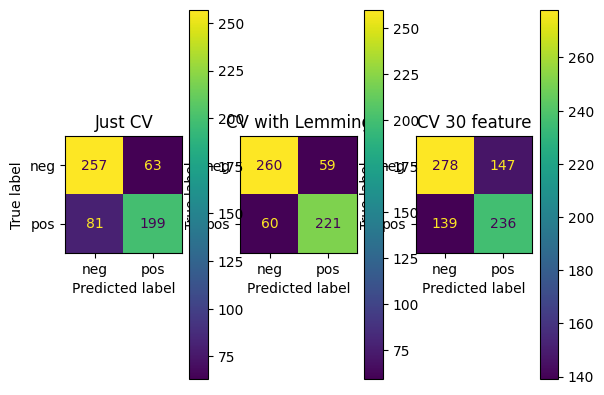

In [133]:

      ################## VIS --------------------
##
## Multiple Confusion Matrices on one Plot
##
######-------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sbs

## "1" is just CV
## "2" is TfIDF
## "3" is CV with Lemming
## "4" is stemmed and binary 
    

plot1 = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix1, 
                                            display_labels = ["neg", "pos"])
    
plot2 = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix2, 
                                            display_labels = ["neg", "pos"])

plot3 = ConfusionMatrixDisplay(confusion_matrix = cnf_matrix3, 
                                            display_labels =["neg", "pos"])


fig, ax = plt.subplots(1,3)
numbers=[0, 1, 2]
names=["Just CV", "CV with Lemming", "CV 30 feature"]

for i,title in zip(numbers,names):   
   print(title, i)
   ax[i].set_title(title)

   ## Create name
   TestsetName=str("Test"+str(i+1)+"Labels")
   #print(TestsetName)
   PredictionName=str("Prediction"+str(i+1))
   #print(PredictionName)
   ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(eval(TestsetName), eval(PredictionName)), 
        display_labels = ["neg", "pos"]).plot(ax=ax[i])







The confusion matrix df1 is:
[[292  28]
 [224  56]]

The confusion matrix df2 is:
[[301  18]
 [228  53]]

The confusion matrix df3 is:
[[200 225]
 [ 96 279]]


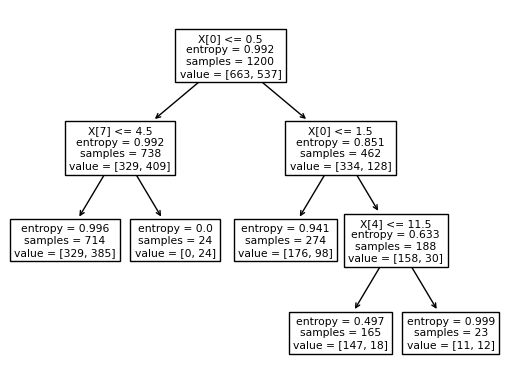

In [136]:

#########################################################
#############    Decision Trees   #######################
#########################################################

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
MyDT=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=5, 
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None, 
                            class_weight=None)


## ------------------------------
## This for loop will fit and predict Decision Trees for 
## all 4 of the dataframes. Notice that this uses dynamic variables
## and eval
##--------------------------
##
# print(TrainDF1)


for i in [1,2,3]:
    temp1=str("TrainDF"+str(i))   ##  TrainDF1
    temp2=str("Train"+str(i)+"Labels")  #Train1Labels
    temp3=str("TestDF"+str(i))  #TestDF1
    temp4=str("Test"+str(i)+"Labels") # Test1Labels
    
    ## perform DT
    #MyDT.fit(TrainDF1, Train1Labels)
    MyDT.fit(eval(temp1), eval(temp2))
    ## plot the tree
    tree.plot_tree(MyDT)
    plt.savefig(temp1)
    feature_names=eval(str(temp1+".columns"))
    dot_data = tree.export_graphviz(MyDT, out_file=None,
                    ## The following creates TrainDF.columns for each
                    ## which are the feature names.
                      feature_names=eval(str(temp1+".columns")),  
                      #class_names=MyDT.class_names,  
                      filled=True, rounded=True,  
                      special_characters=True)                                    
    graph = graphviz.Source(dot_data) 
    ## Create dynamic graph name
    tempname=str("Graph" + str(i))
    graph.render(tempname) 
    ## Show the predictions from the DT on the test set
    # print("\nActual for DataFrame: ", i, "\n")
    # print(eval(temp4))
    # print("Prediction\n")
    DT_pred=MyDT.predict(eval(temp3))
    # print(DT_pred)
    ## Show the confusion matrix
    # accuracy = accuracy_score(eval(temp4), DT_pred)
    # print('Accuracy:', accuracy)
    bn_matrix = confusion_matrix(eval(temp4), DT_pred)
    print("\nThe confusion matrix df"+ str(i) + " is:")
    print(bn_matrix)
    # FeatureImp=MyDT.feature_importances_   
    # indices = np.argsort(FeatureImp)[::-1]
    ## print out the important features.....
    # for f in range(TrainDF4.shape[1]):
    #     if FeatureImp[indices[f]] > 0:
    #         print("%d. feature %d (%f)" % (f + 1, indices[f], FeatureImp[indices[f]]))
    #         print ("feature name: ", feature_names[indices[f]])

## FYI for small datasets you can zip features....
## print(dict(zip(iris_pd.columns, clf.feature_importances_)))




In [139]:

#########################################################
#############   SVM   #######################
#########################################################
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix
SVM_Model1=LinearSVC(C=1)

for i in [1,2,3]:
    temp1=str("TrainDF"+str(i))   ##  TrainDF1
    temp2=str("Train"+str(i)+"Labels")  #Train1Labels
    temp3=str("TestDF"+str(i))  #TestDF1
    temp4=str("Test"+str(i)+"Labels") # Test1Labels
    
    ## perform DT
    #MyDT.fit(TrainDF1, Train1Labels)
    SVM_Model1.fit(eval(temp1), eval(temp2))
    ## Show the predictions from the DT on the test set
    # print("\nActual for DataFrame: ", i, "\n")
    # print(eval(temp2))
    # print("Prediction\n")
    SVM_Model1_pred=SVM_Model1.predict(eval(temp3))
    # print(DT_pred)
    ## Show the confusion matrix
    # accuracy = accuracy_score(eval(temp4), SVM_Model1_pred)
    # print('Accuracy:', accuracy)
    bn_matrix = confusion_matrix(eval(temp4), SVM_Model1_pred)
    print("\nThe confusion matrix df"+ str(i) + " is:")
    print(bn_matrix)





/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "



The confusion matrix df1 is:
[[266  54]
 [ 84 196]]


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "



The confusion matrix df2 is:
[[254  65]
 [ 71 210]]

The confusion matrix df3 is:
[[287 138]
 [160 215]]


/opt/homebrew/lib/python3.10/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [141]:
#########################################################
#############   rbf   #######################
#########################################################

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix
SVM_Model2=sklearn.svm.SVC(C=1, kernel='rbf', 
                           verbose=True, gamma="auto")

for i in [1,2,3]:
    temp1=str("TrainDF"+str(i))   ##  TrainDF1
    temp2=str("Train"+str(i)+"Labels")  #Train1Labels
    temp3=str("TestDF"+str(i))  #TestDF1
    temp4=str("Test"+str(i)+"Labels") # Test1Labels
    
    ## perform DT
    SVM_Model2.fit(eval(temp1), eval(temp2))
    ## Show the predictions from the DT on the test set
    # print("\nActual for DataFrame: ", i, "\n")
    # print(eval(temp2))
    # print("Prediction\n")
    SVM_Model2_pred=SVM_Model2.predict(eval(temp3))
    # print(DT_pred)
    ## Show the confusion matrix
    # accuracy = accuracy_score(eval(temp4), SVM_Model2_pred)
    # print('Accuracy:', accuracy)
    bn_matrix = confusion_matrix(eval(temp4), SVM_Model2_pred)
    print("\nThe confusion matrix df"+ str(i) + " is:")
    print(bn_matrix)






[LibSVM]*
optimization finished, #iter = 717
obj = -1220.031963, rho = 0.255686
nSV = 1291, nBSV = 1240
Total nSV = 1291

The confusion matrix df1 is:
[[320   0]
 [280   0]]
[LibSVM]*
optimization finished, #iter = 747
obj = -1227.791453, rho = 0.093011
nSV = 1302, nBSV = 1218
Total nSV = 1302

The confusion matrix df2 is:
[[319   0]
 [281   0]]
[LibSVM].*
optimization finished, #iter = 1276
obj = -664.268923, rho = -0.021726
nSV = 1107, nBSV = 670
Total nSV = 1107

The confusion matrix df3 is:
[[320 105]
 [210 165]]


In [143]:
##-----------------------------------------
## POLY
##_--------------------------------------------------

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz 
from sklearn.metrics import confusion_matrix
SVM_Model3=sklearn.svm.SVC(C=100, kernel='poly',degree=3,
                           gamma="auto", verbose=True)

for i in [1,2,3]:
    temp1=str("TrainDF"+str(i))   ##  TrainDF1
    temp2=str("Train"+str(i)+"Labels")  #Train1Labels
    temp3=str("TestDF"+str(i))  #TestDF1
    temp4=str("Test"+str(i)+"Labels") # Test1Labels
    
    ## perform DT
    SVM_Model3.fit(eval(temp1), eval(temp2))
    ## Show the predictions from the DT on the test set
    # print("\nActual for DataFrame: ", i, "\n")
    # print(eval(temp2))
    # print("Prediction\n")
    SVM_Model3_pred=SVM_Model3.predict(eval(temp3))
    # print(DT_pred)
    # Show the confusion matrix
    # accuracy = accuracy_score(eval(temp4), SVM_Model3_pred)
    # print('Accuracy:', accuracy)
    bn_matrix = confusion_matrix(eval(temp4), SVM_Model3_pred)
    print("\nThe confusion matrix df"+ str(i) + " is:")
    print(bn_matrix)






[LibSVM]*
optimization finished, #iter = 862
obj = -126293.001160, rho = -0.999963
nSV = 1364, nBSV = 1154
Total nSV = 1364

The confusion matrix df1 is:
[[320   0]
 [280   0]]
[LibSVM]*
optimization finished, #iter = 802
obj = -126088.679557, rho = -0.999956
nSV = 1336, nBSV = 1188
Total nSV = 1336

The confusion matrix df2 is:
[[319   0]
 [281   0]]
[LibSVM]....................................................................................*....................................................*.....................*
optimization finished, #iter = 157070
obj = -2695.625645, rho = -0.437615
nSV = 703, nBSV = 11
Total nSV = 703

The confusion matrix df3 is:
[[262 163]
 [201 174]]
